# Data Analysis for Senvest Capital
#### This notebook provides various analyses on the financial data of senvest capital.

Relevant imports...

In [1]:
%pylab
%matplotlib inline
plt.style.use('ggplot')
import pandas as pd
import seaborn as sns

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
filepath = '/home/matthew/Senvest/'
fin_df = pd.read_csv(filepath + 'Financial Data.csv',index_col=0)
sec = pd.read_csv(filepath + 'StockInfo.csv')
tsx = pd.read_csv(filepath + 'TSX.csv')
rus2000 = pd.read_csv(filepath + "RUSSELL2000.csv")

In [3]:
##Reverse column order (so years are in correct order)
def fix_financial_dataframe(df):
    fixed = df.reindex(df.index[::-1])
    fixed.index = range(len(fixed))
    return fixed

fin_df = fin_df.ix[::,::-1]
stock_info = fix_financial_dataframe(sec)
tsx_info = fix_financial_dataframe(tsx)
russell2000 = fix_financial_dataframe(rus2000)

##Split operational and financial info
operation_info = fin_df.transpose()[fin_df.index[:3]]
financial_data = fin_df.transpose()[fin_df.index[3:]]





## Getting the operational and financial information
Display the relevant data in tables.

In [4]:
operation_info

,Total Revenues & Investment Gains,Net Income Attributable to Common Shareholders,Diluted Earnings Per Share
2011,84712.0,-80682.0,-28.61
2012,154035.0,73964.0,25.65
2013,489676.0,206516.0,73.20
2014,297551.0,117298.0,41.26
2015,-166763.0,-99826.0,-35.39


In [5]:
financial_data

,Total Assets,Shareholders’ Equity
2011,544426.0,284685.0
2012,728409.0,358831.0
2013,1400326.0,630362.0
2014,2020142.0,821740.0
2015,2146380.0,856290.0


## Analyzing the stock information 
First, we'll describe the data. We'll be using the TSX/S&P Composite as a benchmark, and use it to determine the companies beta and visualize the stock movements.

In [6]:
stock_info[['Open','Close']].describe()

,Open,Close
count,976.000000,976.000000
mean,140.541711,140.594867
std,31.654042,31.715283
min,68.010002,68.010002
25%,127.010002,126.690002
50%,149.915001,149.720001
75%,159.000000,159.000000
max,200.350006,200.000000


In [7]:
stock_info.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2013-01-02,71.0,71.0,71.0,71.0,0,71.0
1,2013-01-03,71.0,71.0,71.0,71.0,100,71.0
2,2013-01-04,71.0,71.0,71.0,71.0,0,71.0
3,2013-01-07,71.0,71.0,71.0,71.0,0,71.0
4,2013-01-08,71.0,71.0,71.0,71.0,0,71.0


### Let's map the changes in closing price..

In [20]:
## Drop null row (just last row)
stock_info = stock_info.dropna()
try:
    dropped_05152015 = stock_info.drop(520)
    dropped_05152015.index = range(len(dropped_05152015))
except ValueError:
    print("Already dropped that index")
    print (ValueError)

try:
    russell2000_dropped = russell2000[russell2000['Date'].isin(stock_info['Date'])]
    stock_info_russ_adj = stock_info[stock_info['Date'].isin(russell2000['Date'])]
    russell2000_dropped.index = range(len(russell2000_dropped))
    stock_info_russ_adj.index = range(len(stock_info_russ_adj))
except ValueError:
    print ("Shouldn't occur")
    


percent_changed = pd.DataFrame()
percent_changed['SEC'] = dropped_05152015['Adj Close'].pct_change()
percent_changed['TSX'] = tsx_info['Adj Close'].pct_change()

pct_changed_russ = pd.DataFrame()
pct_changed_russ['RUS'] = russell2000_dropped['Adj Close'].pct_change()
pct_changed_russ['SEC'] = stock_info_russ_adj['Adj Close'].pct_change()

pct_changed_russ.describe()

,RUS,SEC
count,960.000000,960.000000
mean,0.000482,0.000918
std,0.010507,0.015160
min,-0.038987,-0.077703
25%,-0.005261,-0.001962
50%,0.001337,0.000000
75%,0.007250,0.004919
max,0.032005,0.087887


In [15]:
percent_changed = percent_changed.dropna()
pct_changed_russ = pct_changed_russ.dropna()
cov_tsx = np.cov(percent_changed['TSX'],percent_changed['SEC'])[0][1]/np.var(percent_changed['TSX'])
cov_russ = np.cov(pct_changed_russ['RUS'],pct_changed_russ['SEC'])[0][1]/np.var(pct_changed_russ['RUS'])
print ("TSX beta is {}".format(cov_tsx))
print ("Russell 2000 beta is {}".format(cov_russ))

TSX beta is 0.2806179890019744
Russell 2000 beta is 0.16313226403241


## The Beta is ~.28
This was calculated via the formula: covar(% Change in SEC Price, % Change in TSX Price)/var(% Change in TSX price)

## Visualizing Senvest VS TSX/S&P Composite

In [16]:
def plot_against_index(company,index,company_name,index_name):
    figure = plt.figure()
    ax1 = figure.add_subplot(111)
    line1, = ax1.plot(company['Adj Close'],'xb-')
    ylabel(company_name + "SEC Price")


    ax2 = figure.add_subplot(111,sharex=ax1,frameon=False)
    line2, = ax2.plot(index['Adj Close'],'xr-')
    ax2.yaxis.tick_right()
    ax2.yaxis.set_label_position("right")
    ylabel(index_name +  "Price")
    legend((line1,line2),(company_name,index_name))


    plt.xlabel("Days since Jan 2, 2013")

    ax1.grid(False)
    ax2.grid(False)
    plt.title("{} Price vs {} Price".format(company_name,index_name))
    show()


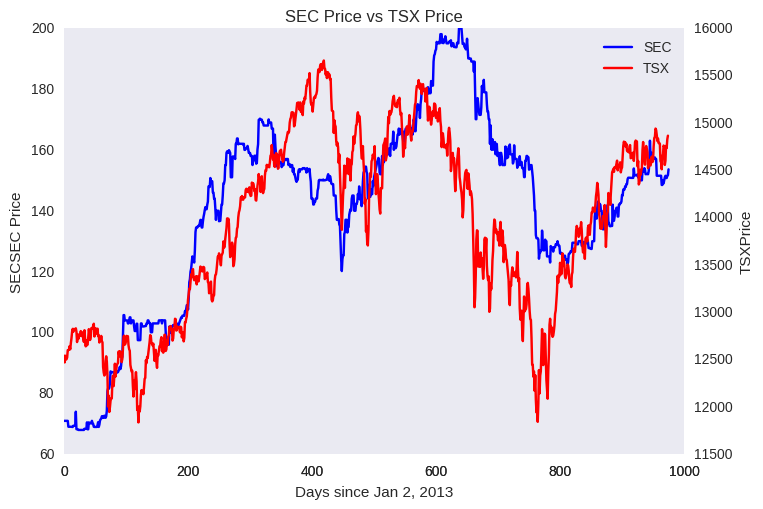

In [17]:
plot_against_index(stock_info,tsx_info,"SEC","TSX")

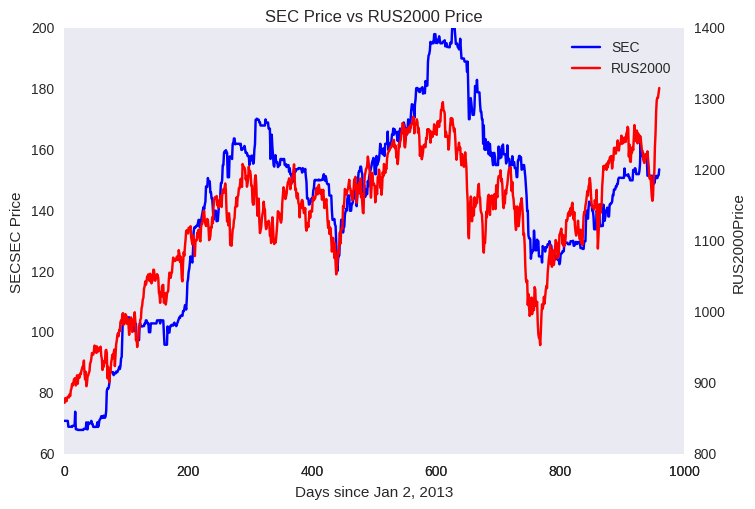

In [19]:
plot_against_index(stock_info_russ_adj,russell2000_dropped,"SEC","RUS2000")